## from decision tree to random forest to gradient boosting 

always remember the row is the observation or called instance, and the column is the features of those instance. we used X to illustared the instance and y for the labels(target vector) in the supervised learning, all need to do is to find the best F. Typical tasks are inclduing the regression, classification, ranking. 

first DT is the good baseline to init and track the model, for the all the features need to make the decision to find the boundary for different target, which is the goal for the classification, so how to split the features, need to use the entropy (from the information theory) and IG(Q)=> information gain, the higher IG, the better spliting point, the range of IG[0,1]. The step is to calculate the probability for each instance, to generate the entropy (S), the higher entropy, the more chaos, the purpose to do this is for the `effective data spliting`, then use the IG to see which one output the max(IG). 

<img src='https://render.githubusercontent.com/render/math?math=%5CLarge%20S%20%3D%20-%5Csum_%7Bi%3D1%7D%5E%7BN%7Dp_i%20%5Clog_2%7Bp_i%7D%2C&mode=display'>

<img src='https://render.githubusercontent.com/render/math?math=%5CLarge%20IG%28Q%29%20%3D%20S_O%20-%20%5Csum_%7Bi%3D1%7D%5E%7Bq%7D%5Cfrac%7BN_i%7D%7BN%7DS_i%2C&mode=display'>  

## below will use the SKLearn for the DT 
the concept need to understand:
- hyperparameter max-depth, which is useful for aviod the overfiting 
- cross validation (cv), its K-fold normally good start with 5, why use cv, obviously to track the model quality  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn.tree import DecisionTreeClassifier
import pydotplus 
from sklearn.tree import export_graphviz 
import pandas_profiling 
import zipfile 

import warnings
warnings.filterwarnings('ignore') 

In [2]:
!kaggle datasets download -d uciml/adult-census-income 

adult-census-income.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
with zipfile.ZipFile("adult-census-income.zip","r") as f:
    f.extractall("dt_data")  

In [4]:
data= pd.read_csv('./dt_data/adult.csv',engine='python')
#use the pandas profiling for the EDA 
data.profile_report(style={'full_width':True})  

In [5]:
from sklearn.model_selection import train_test_split

X= data.loc[:,['age', 'education.num','hours.per.week']]
y=data.loc[:,['income']]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3) 
clf_tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3,
                                  random_state=1234) 
clf_tree.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [6]:
#pred model 
y_pred = clf_tree.predict(X_test) 
y_pred 

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [7]:
from sklearn.metrics import accuracy_score
#print the model accuracy 
print('the decision tree accuracy is {:.4f}'.format(accuracy_score(y_test, y_pred))) 

the decision tree accuracy is 0.7958


In [8]:
y_prob=clf_tree.predict_proba(X_test)
y_prob 

array([[0.66793446, 0.33206554],
       [0.82541371, 0.17458629],
       [0.82541371, 0.17458629],
       ...,
       [0.82541371, 0.17458629],
       [0.82541371, 0.17458629],
       [0.94170193, 0.05829807]])

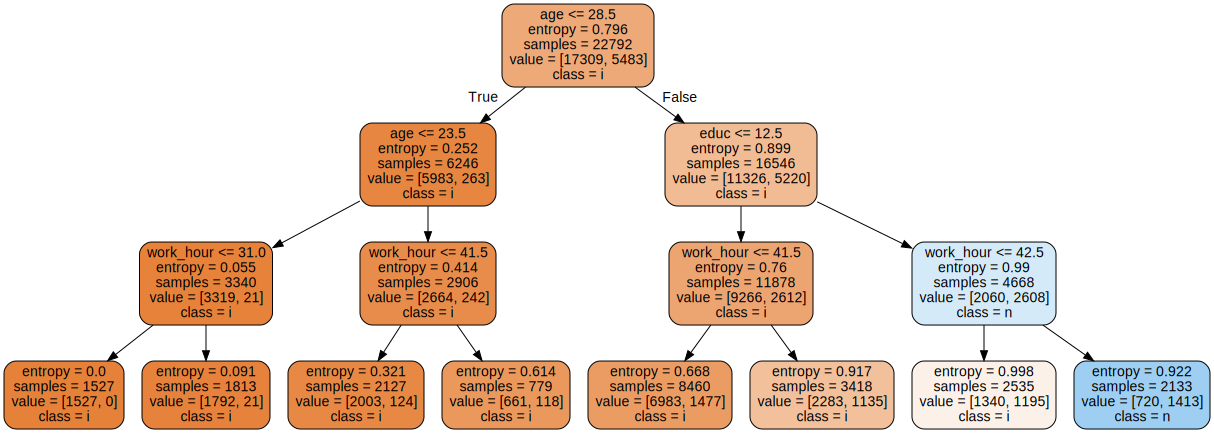

In [13]:
#get the train graph 
from sklearn import tree 
import graphviz  
split = tree.export_graphviz(clf_tree, out_file=None,
                               filled=True, rounded=True,
                               feature_names=['age','educ','work_hour'],
                               class_names='income')  
graph = graphviz.Source(split)  
graph 

if just this easy, yes its easy to use sklearn to easy build decision tree, but for the machine learning, parameter tunining is one necessary step. <br/> 
for one of the major setback of DT is overfitting the model, pruning the tree comes then. Apply ensemble learning Random Forest.  

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from numpy.random import permutation
from numpy import array_split, concatenate
from sklearn.metrics import roc_curve, auc, mean_squared_error 


In [18]:
class Income:
    
    def __init__(self, file):
        self.df= pd.read_csv(file)
        
        for k in self.df.columns[1:]:
            self.df[k], _= pd.factorize(self.df[k]) 
            sorted_cats= sorted(pd.Categorical(self.df['class'].categories))
            self.classes = np.array(sorted_cats) 
            self.features = self.df.columns[self.df.columns != 'class']
            
    def __factorize(self, data):
        y,_= pd.factorize(pd.Categorical(data['class']), sort= True) 
        
        return y 

In [ ]:
class MushroomForest(MushroomClassifier):
    def train(self, X, Y):
        clf = RandomForestClassifier(n_jobs = 2)
        clf = clf.fit(X, Y)
        return clf  


class MushroomTree(MushroomClassifier):
    def train(self, X, Y):
        clf = DecisionTreeClassifier()
        clf = clf.fit(X, Y)
        return clf  

In [19]:
def val(x):
    if (weight*x+b)>0.5:
        return 1
    else:
        return 0 